In [21]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("http://taqm.epa.gov.tw/taqm/tw/MonthlyAverage.aspx")

data={}

selectSite = Select(browser.find_element_by_id("ctl05_ddlSite"))
selectSite.select_by_value('58')

selectYear = Select(browser.find_element_by_id("ctl05_ddlYear"))
selectYear.select_by_value('2010')
   
browser.find_element_by_id('ctl05_btnQuery').click()

In [18]:
html_source = browser.page_source
soup = BeautifulSoup(html_source, 'html.parser')
table = soup.find('table', class_='TABLE_G')

In [19]:
for tag in table.find_all('td'):
    if 'class' in tag.attrs and 'style' in tag.attrs:
        name=tag.text
        data[name]={}
    else:
        if re.compile("\d{4}\/\d{2}").match(tag.text):
            date=tag.text
            data[name][date]={}
        elif re.compile("\d+").match(tag.text):
            value=tag.text
            data[name][date]=value

In [54]:
hisdata=pd.DataFrame(data)
hisdata
hisdata['SO2'] = hisdata['SO2'].astype(float)
hisdata['CO'] = hisdata['CO'].astype(float)
hisdata['O3'] = hisdata['O3'].astype(float)
hisdata['PM10'] = hisdata['PM10'].astype(float)
hisdata['NOx'] = hisdata['NOx'].astype(float)
hisdata['NO'] = hisdata['NO'].astype(float)
hisdata['NO2'] = hisdata['NO2'].astype(float)
hisdata['THC'] = hisdata['SO2'].astype(float)
hisdata['NMHC'] = hisdata['NMHC'].astype(float)
hisdata['CH4'] = hisdata['CH4'].astype(float)

<Figure size 720x576 with 0 Axes>

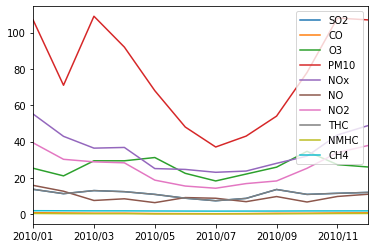

In [55]:
plt.figure(figsize=(10, 8))
hisdata[['SO2','CO','O3','PM10','NOx','NO','NO2','THC','NMHC','CH4']].plot()
plt.legend(loc="upper right")
plt.show()